## Keras -- MLPs on MNIST

In [1]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [5]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [6]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [7]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [8]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [9]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [10]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [11]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

In [12]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

<h2>  Softmax classifier  </h2>

<h2> Model 1. 2 hidden layer, ReLU, Dropout, BatchNormalization and AdamOptimizer </h2>

In [13]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras



model_1 = Sequential()

model_1.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None), input_shape=(input_dim,)) )
model_1.add(BatchNormalization())
model_1.add(Dropout(0.5))

model_1.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.176, seed=None)) )
model_1.add(BatchNormalization())
model_1.add(Dropout(0.5))

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()


W0715 18:42:29.220162 11376 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0715 18:42:29.232118 11376 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0715 18:42:29.234127 11376 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\keras\backend\tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0715 18:42:29.294940 11376 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeho

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total para

In [14]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

W0715 18:42:31.010054 11376 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0715 18:42:31.090867 11376 deprecation.py:323] From C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.9239 - acc: 0.7141 - val_loss: 0.2713 - val_acc: 0.9185
Epoch 2/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.4345 - acc: 0.8711 - val_loss: 0.2065 - val_acc: 0.9355
Epoch 3/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.3440 - acc: 0.8991 - val_loss: 0.1721 - val_acc: 0.9464
Epoch 4/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.2976 - acc: 0.9140 - val_loss: 0.1457 - val_acc: 0.9540
Epoch 5/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.2635 - acc: 0.9225 - val_loss: 0.1367 - val_acc: 0.9558
Epoch 6/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.2377 - acc: 0.9308 - val_loss: 0.1243 - val_acc: 0.9610
Epoch 7/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.2229 - acc: 0.9361 - val_loss: 0.1137 - val_acc

Test score: 0.08059193601340521
Test accuracy: 0.9764


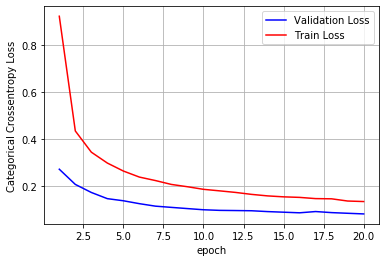

In [15]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> Model 1. 2 hidden layer, ReLU, Dropout and AdamOptimizer </h2>

In [16]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras



model_1 = Sequential()

model_1.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None), input_shape=(input_dim,)) )
model_1.add(Dropout(0.5))

model_1.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.176, seed=None)) )
model_1.add(Dropout(0.5))

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [17]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 22us/step - loss: 1.2017 - acc: 0.6102 - val_loss: 0.3453 - val_acc: 0.9066
Epoch 2/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.5247 - acc: 0.8416 - val_loss: 0.2322 - val_acc: 0.9323
Epoch 3/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.4000 - acc: 0.8858 - val_loss: 0.1899 - val_acc: 0.9445
Epoch 4/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.3436 - acc: 0.9016 - val_loss: 0.1686 - val_acc: 0.9523
Epoch 5/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.3039 - acc: 0.9153 - val_loss: 0.1504 - val_acc: 0.9574
Epoch 6/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.2777 - acc: 0.9220 - val_loss: 0.1411 - val_acc: 0.9607
Epoch 7/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.2511 - acc: 0.9294 - val_loss: 0.1360 - val_acc

Test score: 0.10739179229954025
Test accuracy: 0.9727


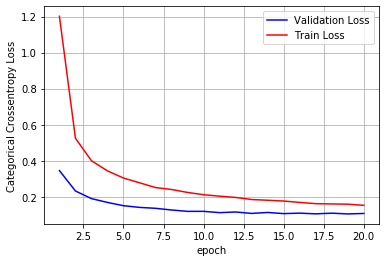

In [18]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> Model 1. 2 hidden layer, ReLU, Dropout, BatchNormalization and AdamOptimizer </h2>

In [19]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras



model_1 = Sequential()

model_1.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None), input_shape=(input_dim,)) )
model_1.add(BatchNormalization())
model_1.add(Dropout(0.2))

model_1.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.176, seed=None)) )
model_1.add(BatchNormalization())
model_1.add(Dropout(0.2))

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_4 (Batch (None, 64)                256       
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
Total para

In [20]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.5259 - acc: 0.8396 - val_loss: 0.1926 - val_acc: 0.9411
Epoch 2/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.2251 - acc: 0.9331 - val_loss: 0.1399 - val_acc: 0.9580
Epoch 3/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.1740 - acc: 0.9471 - val_loss: 0.1148 - val_acc: 0.9629
Epoch 4/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.1438 - acc: 0.9562 - val_loss: 0.0969 - val_acc: 0.9704
Epoch 5/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.1234 - acc: 0.9619 - val_loss: 0.0919 - val_acc: 0.9718
Epoch 6/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.1093 - acc: 0.9660 - val_loss: 0.0879 - val_acc: 0.9730
Epoch 7/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.1014 - acc: 0.9682 - val_loss: 0.0784 - val_acc

Test score: 0.06737108307137678
Test accuracy: 0.9807


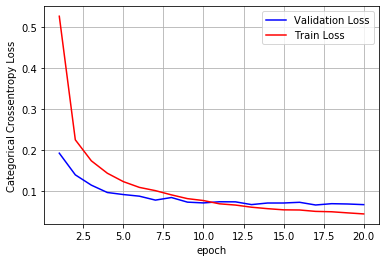

In [21]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

`This model is stable after 10 epochs. training further will make the model overfit to train data.`

<h2> Model 1. 2 hidden layer, ReLU, Dropout, BatchNormalization and AdamOptimizer </h2>

In [22]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras



model_1 = Sequential()

model_1.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None), input_shape=(input_dim,)) )
model_1.add(BatchNormalization())
model_1.add(Dropout(0.8))

model_1.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.176, seed=None)) )
model_1.add(BatchNormalization())
model_1.add(Dropout(0.8))

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()


W0715 18:44:06.593636 11376 nn_ops.py:4224] Large dropout rate: 0.8 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0715 18:44:06.665421 11376 nn_ops.py:4224] Large dropout rate: 0.8 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               100480    
_________________________________________________________________
batch_normalization_5 (Batch (None, 128)               512       
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
batch_normalization_6 (Batch (None, 64)                256       
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                650       
Total para

In [23]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 39us/step - loss: 2.1479 - acc: 0.3531 - val_loss: 0.7555 - val_acc: 0.8517
Epoch 2/20
60000/60000 [==============================] - 2s 28us/step - loss: 1.2069 - acc: 0.5817 - val_loss: 0.5305 - val_acc: 0.8823
Epoch 3/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.9829 - acc: 0.6711 - val_loss: 0.4108 - val_acc: 0.8977
Epoch 4/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.8540 - acc: 0.7230 - val_loss: 0.3469 - val_acc: 0.9060
Epoch 5/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.7693 - acc: 0.7580 - val_loss: 0.3085 - val_acc: 0.9151
Epoch 6/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.7085 - acc: 0.7846 - val_loss: 0.2826 - val_acc: 0.9192
Epoch 7/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.6728 - acc: 0.7994 - val_loss: 0.2663 - val_acc

Test score: 0.19782737234905362
Test accuracy: 0.9443


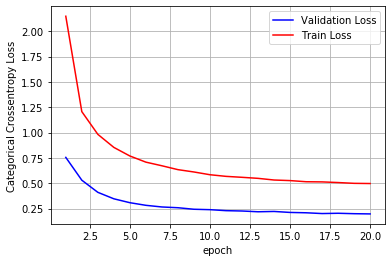

In [24]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

`Due to high dropout rate the model became stable at a high loss than other model and after 10 epoch it is not moving towards the minima`

<h2> Model 2. 3 hidden layer, ReLU, Dropout, BatchNormalization and AdamOptimizer </h2>

In [25]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras



model_2 = Sequential()

model_2.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))

model_2.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))

model_2.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.176, seed=None)) )
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))

model_2.add(Dense(output_dim, activation='softmax'))


model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_7 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_8 (Batch (None, 128)               512       
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                8256      
__________

In [26]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.8009 - acc: 0.7527 - val_loss: 0.2047 - val_acc: 0.9364
Epoch 2/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.3331 - acc: 0.9038 - val_loss: 0.1434 - val_acc: 0.9528
Epoch 3/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.2573 - acc: 0.9271 - val_loss: 0.1162 - val_acc: 0.9629
Epoch 4/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.2104 - acc: 0.9410 - val_loss: 0.0986 - val_acc: 0.9690
Epoch 5/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.1828 - acc: 0.9490 - val_loss: 0.0913 - val_acc: 0.9751
Epoch 6/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.1611 - acc: 0.9559 - val_loss: 0.0885 - val_acc: 0.9738
Epoch 7/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.1474 - acc: 0.9576 - val_loss: 0.0812 - val_acc

Test score: 0.06315016652900377
Test accuracy: 0.9823


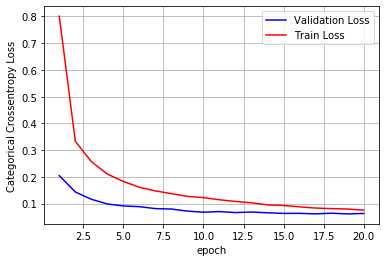

In [27]:
score = model_2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> Model 2. 3 hidden layer, ReLU, Dropout and AdamOptimizer </h2>

In [28]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras



model_2 = Sequential()

model_2.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_2.add(Dropout(0.5))

model_2.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_2.add(Dropout(0.5))

model_2.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.176, seed=None)) )
model_2.add(Dropout(0.5))

model_2.add(Dense(output_dim, activation='softmax'))


model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                650       
Total para

In [29]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 84us/step - loss: 1.1420 - acc: 0.6327 - val_loss: 0.2604 - val_acc: 0.9287
Epoch 2/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.4306 - acc: 0.8802 - val_loss: 0.1797 - val_acc: 0.9508
Epoch 3/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.3154 - acc: 0.9168 - val_loss: 0.1521 - val_acc: 0.9590
Epoch 4/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.2582 - acc: 0.9323 - val_loss: 0.1386 - val_acc: 0.9640
Epoch 5/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.2209 - acc: 0.9430 - val_loss: 0.1261 - val_acc: 0.9664
Epoch 6/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.2000 - acc: 0.9481 - val_loss: 0.1072 - val_acc: 0.9723
Epoch 7/20
60000/60000 [==============================] - ETA: 0s - loss: 0.1823 - acc: 0.952 - 4s 72us/step - loss: 0.1826 - ac

Test score: 0.08312617581425139
Test accuracy: 0.9807


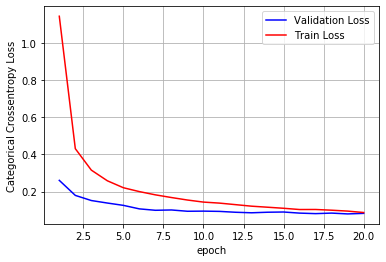

In [30]:
score = model_2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> Model 3. 3 hidden layer, ReLU, Dropout, BatchNormalization and AdamOptimizer </h2>

In [31]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras



model_2 = Sequential()

model_2.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.2))

model_2.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_2.add(BatchNormalization())
model_2.add(Dropout(0.2))

model_2.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.176, seed=None)) )
model_2.add(BatchNormalization())
model_2.add(Dropout(0.2))

model_2.add(Dense(output_dim, activation='softmax'))


model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_10 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_15 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_11 (Batc (None, 128)               512       
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 64)                8256      
__________

In [32]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.3539 - acc: 0.8956 - val_loss: 0.1141 - val_acc: 0.9654
Epoch 2/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.1448 - acc: 0.9573 - val_loss: 0.0891 - val_acc: 0.9732
Epoch 3/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.1093 - acc: 0.9661 - val_loss: 0.0794 - val_acc: 0.9747
Epoch 4/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.0881 - acc: 0.9730 - val_loss: 0.0681 - val_acc: 0.9787
Epoch 5/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.0756 - acc: 0.9760 - val_loss: 0.0728 - val_acc: 0.9780
Epoch 6/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.0660 - acc: 0.9797 - val_loss: 0.0626 - val_acc: 0.9802
Epoch 7/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.0566 - acc: 0.9823 - val_loss: 0.0657 - val_ac

Test score: 0.058136306594208875
Test accuracy: 0.9854


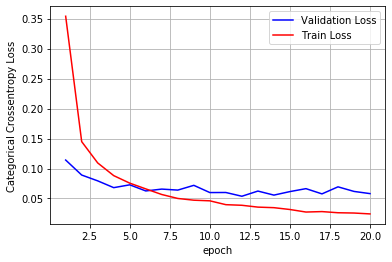

In [33]:
score = model_2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> Model 3. 3 hidden layer, ReLU, Dropout, BatchNormalization and AdamOptimizer </h2>

In [34]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras



model_2 = Sequential()

model_2.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.8))

model_2.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_2.add(BatchNormalization())
model_2.add(Dropout(0.8))

model_2.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.176, seed=None)) )
model_2.add(BatchNormalization())
model_2.add(Dropout(0.8))

model_2.add(Dense(output_dim, activation='softmax'))


model_2.summary()

W0715 18:49:34.213879 11376 nn_ops.py:4224] Large dropout rate: 0.8 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0715 18:49:34.288651 11376 nn_ops.py:4224] Large dropout rate: 0.8 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0715 18:49:34.363479 11376 nn_ops.py:4224] Large dropout rate: 0.8 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_13 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_18 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_14 (Batc (None, 128)               512       
_________________________________________________________________
dropout_19 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 64)                8256      
__________

In [35]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 105us/step - loss: 2.4937 - acc: 0.2566 - val_loss: 1.1451 - val_acc: 0.7325
Epoch 2/20
60000/60000 [==============================] - 5s 85us/step - loss: 1.4336 - acc: 0.4918 - val_loss: 0.7489 - val_acc: 0.8238
Epoch 3/20
60000/60000 [==============================] - 5s 85us/step - loss: 1.1254 - acc: 0.6133 - val_loss: 0.5330 - val_acc: 0.8762
Epoch 4/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.9454 - acc: 0.6819 - val_loss: 0.4127 - val_acc: 0.9009
Epoch 5/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.8193 - acc: 0.7359 - val_loss: 0.3276 - val_acc: 0.9199
Epoch 6/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.7250 - acc: 0.7723 - val_loss: 0.2828 - val_acc: 0.9273
Epoch 7/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.6651 - acc: 0.7997 - val_loss: 0.2425 - val_ac

Test score: 0.1369463347967714
Test accuracy: 0.9648


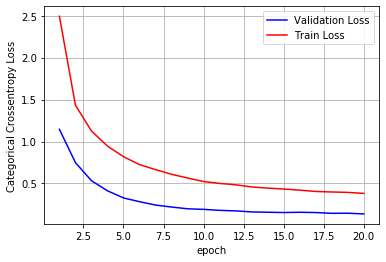

In [36]:
score = model_2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> Model 3. 5 hidden layer, ReLU, Dropout, BatchNormalization and AdamOptimizer </h2>

In [37]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

model_3 = Sequential()

model_3.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))

model_3.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))

model_3.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.176, seed=None)) )
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))

model_3.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.176, seed=None)) )
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))

model_3.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))

model_3.add(Dense(output_dim, activation='softmax'))


model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_16 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_21 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_17 (Batc (None, 128)               512       
_________________________________________________________________
dropout_22 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 64)                8256      
__________

In [38]:
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 128us/step - loss: 1.6475 - acc: 0.4693 - val_loss: 0.4033 - val_acc: 0.8867
Epoch 2/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.6705 - acc: 0.7905 - val_loss: 0.2357 - val_acc: 0.9349
Epoch 3/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.4587 - acc: 0.8699 - val_loss: 0.1786 - val_acc: 0.9511
Epoch 4/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.3607 - acc: 0.9007 - val_loss: 0.1519 - val_acc: 0.9588
Epoch 5/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.3025 - acc: 0.9191 - val_loss: 0.1399 - val_acc: 0.9642
Epoch 6/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.2703 - acc: 0.9301 - val_loss: 0.1225 - val_acc: 0.9695
Epoch 7/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.2407 - acc: 0.9386 - val_loss: 0.1176 - val_ac

Test score: 0.07966478181201965
Test accuracy: 0.9823


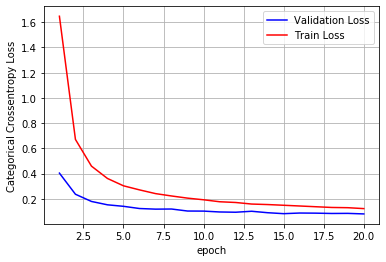

In [39]:
score = model_3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> Model 3. 5 hidden layer, ReLU, Dropout and AdamOptimizer </h2>

In [40]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

model_3 = Sequential()

model_3.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_3.add(Dropout(0.5))

model_3.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_3.add(Dropout(0.5))

model_3.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.176, seed=None)) )
model_3.add(Dropout(0.5))

model_3.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.176, seed=None)) )
model_3.add(Dropout(0.5))

model_3.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_3.add(Dropout(0.5))

model_3.add(Dense(output_dim, activation='softmax'))


model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_26 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_27 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_28 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 64)                4160      
__________

In [41]:
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 103us/step - loss: 2.1719 - acc: 0.2328 - val_loss: 1.4112 - val_acc: 0.4797
Epoch 2/20
60000/60000 [==============================] - 5s 82us/step - loss: 1.2927 - acc: 0.5287 - val_loss: 0.8277 - val_acc: 0.6854
Epoch 3/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.9126 - acc: 0.6637 - val_loss: 0.5805 - val_acc: 0.8139
Epoch 4/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.7038 - acc: 0.7515 - val_loss: 0.4486 - val_acc: 0.8323
Epoch 5/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.5840 - acc: 0.7958 - val_loss: 0.3832 - val_acc: 0.8513
Epoch 6/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.5204 - acc: 0.8157 - val_loss: 0.3473 - val_acc: 0.8589
Epoch 7/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.4657 - acc: 0.8338 - val_loss: 0.3145 - val_ac

Test score: 0.13398695126250387
Test accuracy: 0.9692


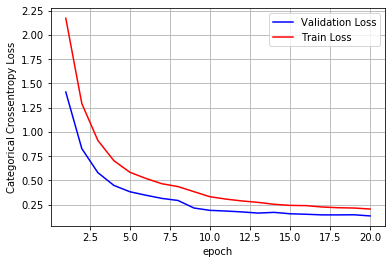

In [42]:
score = model_3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> Model 3. 5 hidden layer, ReLU, Dropout, BatchNormalization and AdamOptimizer </h2>

In [43]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

model_3 = Sequential()

model_3.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.2))

model_3.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_3.add(BatchNormalization())
model_3.add(Dropout(0.2))

model_3.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.176, seed=None)) )
model_3.add(BatchNormalization())
model_3.add(Dropout(0.2))

model_3.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.176, seed=None)) )
model_3.add(BatchNormalization())
model_3.add(Dropout(0.2))

model_3.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_3.add(BatchNormalization())
model_3.add(Dropout(0.2))

model_3.add(Dense(output_dim, activation='softmax'))


model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_21 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_31 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_22 (Batc (None, 128)               512       
_________________________________________________________________
dropout_32 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 64)                8256      
__________

In [44]:
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.5371 - acc: 0.8352 - val_loss: 0.1464 - val_acc: 0.9552
Epoch 2/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.2128 - acc: 0.9385 - val_loss: 0.1091 - val_acc: 0.9672
Epoch 3/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.1594 - acc: 0.9534 - val_loss: 0.0922 - val_acc: 0.9725
Epoch 4/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.1300 - acc: 0.9622 - val_loss: 0.0867 - val_acc: 0.9734
Epoch 5/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.1093 - acc: 0.9679 - val_loss: 0.0753 - val_acc: 0.9784
Epoch 6/20
60000/60000 [==============================] - 7s 111us/step - loss: 0.0980 - acc: 0.9712 - val_loss: 0.0803 - val_acc: 0.9770
Epoch 7/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.0893 - acc: 0.9731 - val_loss: 0.0781 - 

Test score: 0.06305098229350987
Test accuracy: 0.9829


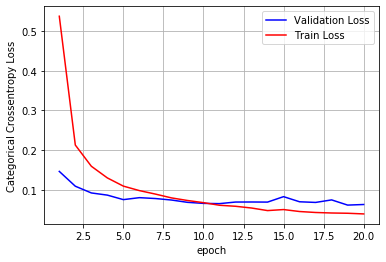

In [45]:
score = model_3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> Model 3. 5 hidden layer, ReLU, Dropout, BatchNormalization and AdamOptimizer </h2>

In [46]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

model_3 = Sequential()

model_3.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.8))

model_3.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_3.add(BatchNormalization())
model_3.add(Dropout(0.8))

model_3.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.176, seed=None)) )
model_3.add(BatchNormalization())
model_3.add(Dropout(0.8))

model_3.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.176, seed=None)) )
model_3.add(BatchNormalization())
model_3.add(Dropout(0.8))

model_3.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_3.add(BatchNormalization())
model_3.add(Dropout(0.8))

model_3.add(Dense(output_dim, activation='softmax'))


model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_26 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_36 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_27 (Batc (None, 128)               512       
_________________________________________________________________
dropout_37 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 64)                8256      
__________

In [47]:
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 144us/step - loss: 3.0380 - acc: 0.1137 - val_loss: 2.3314 - val_acc: 0.1145
Epoch 2/20
60000/60000 [==============================] - 6s 106us/step - loss: 2.2017 - acc: 0.1747 - val_loss: 2.2887 - val_acc: 0.1366
Epoch 3/20
60000/60000 [==============================] - 6s 103us/step - loss: 2.0982 - acc: 0.2019 - val_loss: 2.2321 - val_acc: 0.1283
Epoch 4/20
60000/60000 [==============================] - 6s 103us/step - loss: 2.0141 - acc: 0.2138 - val_loss: 2.1096 - val_acc: 0.1461
Epoch 5/20
60000/60000 [==============================] - 7s 112us/step - loss: 1.9522 - acc: 0.2232 - val_loss: 1.9815 - val_acc: 0.1942
Epoch 6/20
60000/60000 [==============================] - 6s 104us/step - loss: 1.8904 - acc: 0.2424 - val_loss: 1.8959 - val_acc: 0.2227
Epoch 7/20
60000/60000 [==============================] - 6s 106us/step - loss: 1.8227 - acc: 0.2633 - val_loss: 1.8004 - 

Test score: 0.9821138044357299
Test accuracy: 0.5892


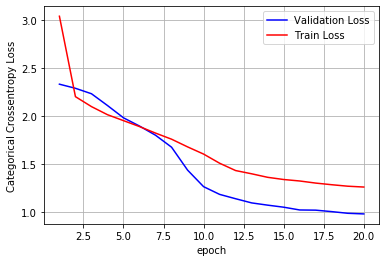

In [48]:
score = model_3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [2]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model", "train_auc","test_auc", "best_among_three"]
x.add_row(["Model 1", "0.5", "Yes"])
x.add_row(["Model 2", "0.5" , "No"])
x.add_row(["Model 3", "0.2", "Yes"])
x.border=True
print(x)

Exception: Row has incorrect number of values, (actual) 3!=4 (expected)

<li>Best model is Model 3.3 as it has both train and test score as 0.989 and 0.984 respectively</li>
<li>Drop out of value 0.8 hurts the model. <b>0.5</b> dropout is reasonable.</li>
<li>From result 1.2, 2.2, 3.2 its pretty clear that batch Normalization is needed in later stages of deep neural network, especially having more than 3 hidden layers. It is always good to do batch Normalization.</li>